In [4]:
import obspy
from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
import os
import glob
import numpy
from shutil import move

In [39]:
def do_selectSNR(data_dir, TNoise1, TNoise2, TSignal1, TSignal2, thresh):
    """
    select data according the SNR > thresh, for certain phase e.g., t1(P) which has been stored in sacheader.
    TNoise1, TNoise2 the time before e.g., t1
    TSignal1 the time before t1 and  TSignal2 the time after t1
    """
    if not os.path.exists(data_dir):
        print("Missing File: %s" % data_dir)
        os.sys.exit()
    if(TNoise1 <= TNoise2 or TSignal1 >= TSignal2):
        print("The window has not been well set, check that!")
        os.sys.exit()
    total_run_num = len(os.listdir(data_dir))
    run_num = 0
    for ev in os.listdir(data_dir):
        run_num +=1
        if run_num%10 == 0 or run_num ==1:
            
            print(f"run {run_num} of {total_run_num}")
        inpath = os.path.join(data_dir, ev)

        funiq = []
        for sac in glob.glob(f"{inpath}/*.SAC.bp.cut"):
            st = obspy.read(sac)
            funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
        fU = sorted(set(funiq))

        f = open(f"{inpath}/snr.info", "w")
        for sacfile in fU:
            try:
                st = obspy.read(glob.glob(f"{inpath}/{sacfile}*Z.SAC.bp.cut")[0])
                #print(st)
            except: 
                print("reading, possible error")
                print(sacfile, ev)
                
                continue
                
            # ****not sure what this line does    
            T = get_sac_reftime(st[0].stats.sac) + st[0].stats.sac.t1
            
            # measure noise level
            tr = st.copy()
            #pad
            
            tr.trim(starttime = T-TNoise1, endtime = T-TNoise2, fill_value=0)
            Noisamean = sum(abs(tr[0].data))/len(tr[0].data)
            #tr[0].data returns all the data pts as an array
            #the reason for [0] is because you can have multiple traces in stream
            
            # measure signal level
            tr = st.copy()
            tr.trim(starttime = T-TSignal1, endtime = T+TSignal2, fill_value=0)
            SignMax = max(abs(tr[0].data))
            #the highest/lowest pt of the trace
            
            # define the signal to noise value
            snr = SignMax/Noisamean
            
            #print(snr)
            #print(thresh)
            #***not sure what this is doing either, is it writing snr into the SAC file?
            f.write("{} {}\n".format(snr,sacfile))
            if (snr < thresh):
                #print(snr)
                if not os.path.exists(f"{inpath}/Bad"):
                    os.makedirs(f"{inpath}/Bad")
                print("removed ********* {} {} ***********".format(snr, sacfile))
                for sacsnr in glob.glob(f"{inpath}/{sacfile}*.SAC*"):
                    move(sacsnr,f"{inpath}/Bad/")
        f.close()

In [37]:
def print_snr(st, TNoise1, TNoise2, TSignal1, TSignal2):
    
    
    
    T = get_sac_reftime(st[0].stats.sac) + st[0].stats.sac.t1
    # measure noise level
    tr = st.copy()
    tr.trim(starttime = T-TNoise1, endtime = T-TNoise2, fill_value=0)
    Noisamean = sum(abs(tr[0].data))/len(tr[0].data)
    # measure signal level
    tr = st.copy()
    tr.trim(starttime = T+TSignal1, endtime = T+TSignal2, fill_value=0)
    SignMax = max(abs(tr[0].data))
    # define the signal to noise value
    snr = SignMax/Noisamean
    print(snr)

In [38]:
# filter data
data_sac = "./Download/SAC"
TNoise1 = 15  # noise window_left before t1
TNoise2 = 5   # noise window_right before t1
TSignal1 = 5  # signal window_left before t1 ***should this be after?
TSignal2 = 10 # signal window_right after t1
thresh = 10.0  # threshold to select data
do_selectSNR(data_sac, TNoise1, TNoise2, TSignal1, TSignal2, thresh)

run 1 of 514
12.86218678279559
10.0
13.633234682150425
10.0
11.699340936004104
10.0
102.0940791084662
10.0
21.644558308394018
10.0
10.318214790146474
10.0
31.981720817158976
10.0
16.771059040342287
10.0
15.537710930234697
10.0
17.539895907752815
10.0
15.753236468470963
10.0
21.28043207016252
10.0
16.47231784857143
10.0
10.870899020721659
10.0
22.169916256462162
10.0
10.78929608625077
10.0
20.81273838551974
10.0
15.828280111727706
10.0
13.333110732041266
10.0
18.05298423655581
10.0
25.56194712899649
10.0
10.535388605776696
10.0
11.070988368181789
10.0
18.13829364795219
10.0
11.86573503291177
10.0
17.035231555864353
10.0
11.546820942546304
10.0
82.56634270529128
10.0
21.114831935682574
10.0
26.252583825379283
10.0
369.5378264531719
10.0
15.148534400887272
10.0
17.47366206687373
10.0
540.1551354443737
10.0
415.2544499238193
10.0
541.0454250872577
10.0
328.76891950386965
10.0
10.028793353658282
10.0
10.717908150891235
10.0
18.190621836616042
10.0
246.2146437375937
10.0
22.71594681560512
10

30.659696485916506
10.0
114.86620115909096
10.0
14.651566019489389
10.0
24.96432377388383
10.0
14.18129497004812
10.0
10.145922750096119
10.0
16.811218673730075
10.0
161.52833271203502
10.0
34.821544500770955
10.0
12.418774953057822
10.0
32.00258703985524
10.0
64.63990192886746
10.0
182.32940601823086
10.0
22.60134532952561
10.0
157.74355471485066
10.0
31.460197517788
10.0
13.579806150952813
10.0
13.451220368737168
10.0
15.4413012041831
10.0
21.887324276646464
10.0
101.66038108188104
10.0
14.704101627583185
10.0
12.473683253402104
10.0
10.341143727939125
10.0
79.23014741571738
10.0
15.603728480000434
10.0
176.8690331230888
10.0
13.246932882922671
10.0
29.066616184578578
10.0
10.343930877879647
10.0
26.229436799614902
10.0
38.101249615030895
10.0
11.555384790638294
10.0
154.35520306371296
10.0
17.188901072860673
10.0
23.97802895649906
10.0
205.2741185373215
10.0
41.62743550397301
10.0
57.8337246987657
10.0
441.12151119303866
10.0
11.757279384199345
10.0
10.685140004326708
10.0
15.525951

KeyboardInterrupt: 

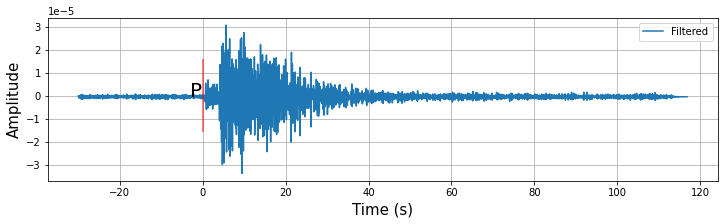

71.71333525159511


In [29]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

TNoise1 = 15  # noise window_left before t1
TNoise2 = 0   # noise window_right before t1
TSignal1 = 5  # signal window_left before t1
TSignal2 = 10 

wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/BC.CPX..HHZ.SAC.bp.cut")

d1 = st[0].data
d1 -= d1[0]

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)

plt.figure(figsize=(12,3))
plt.plot(t,d1,label="Filtered")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(d1)*0.5, max(d1)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1-3, -1*max(d1)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()
print_snr(st, TNoise1, TNoise2, TSignal1, TSignal2)